In [1]:
import sys
sys.path.append("../utils")
from utils import load_data,load_encoded_data, set_random_seed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr

non_encoded_train, test, targets = load_data(raw=False)
ae, vae, cgc, pca = load_encoded_data()
set_random_seed(42)

nb_cell_lines = 742

ae_train = ae[:nb_cell_lines]
ae_test = ae[nb_cell_lines:]

vae_train = vae[:nb_cell_lines]
vae_test = vae[nb_cell_lines:]

pca_train = pca[:nb_cell_lines]
pca_test = pca[nb_cell_lines:]

cgc_train = cgc[:nb_cell_lines]
cgc_test = cgc[nb_cell_lines:]

#vae2_train = vae2[:nb_cell_lines]
#vae2_test = vae2[nb_cell_lines:]

X_train, X_val, y_train, y_val = train_test_split(non_encoded_train, targets, test_size=0.2, random_state=42)
X_train_ae, X_val_ae, y_train_ae, y_val_ae = train_test_split(ae_train, targets, test_size=0.2, random_state=42)
X_train_vae, X_val_vae, y_train_vae, y_val_vae = train_test_split(vae_train, targets, test_size=0.2, random_state=42)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(pca_train, targets, test_size=0.2, random_state=42)
X_train_cgc, X_val_cgc, y_train_cgc, y_val_cgc = train_test_split(cgc_train, targets, test_size=0.2, random_state=42)


print("Data loaded")

Data loaded


Epoch [10/1000], Loss: 0.3031, Train Spearman: 0.9541, Val Spearman: 0.2712
Epoch [20/1000], Loss: 0.2057, Train Spearman: 0.9870, Val Spearman: 0.3281
Epoch [30/1000], Loss: 0.1621, Train Spearman: 0.9951, Val Spearman: 0.3531
Epoch [40/1000], Loss: 0.1371, Train Spearman: 0.9979, Val Spearman: 0.3624
Epoch [50/1000], Loss: 0.1191, Train Spearman: 0.9990, Val Spearman: 0.3648
Epoch [60/1000], Loss: 0.1069, Train Spearman: 0.9994, Val Spearman: 0.3684
Epoch [70/1000], Loss: 0.1003, Train Spearman: 0.9996, Val Spearman: 0.3649
Epoch [80/1000], Loss: 0.0953, Train Spearman: 0.9997, Val Spearman: 0.3623
Epoch [90/1000], Loss: 0.0905, Train Spearman: 0.9998, Val Spearman: 0.3600
Epoch [100/1000], Loss: 0.0864, Train Spearman: 0.9997, Val Spearman: 0.3604
Epoch [110/1000], Loss: 0.0843, Train Spearman: 0.9998, Val Spearman: 0.3596
Epoch [120/1000], Loss: 0.0821, Train Spearman: 0.9998, Val Spearman: 0.3671
Epoch [130/1000], Loss: 0.0809, Train Spearman: 0.9998, Val Spearman: 0.3647
Epoch [1

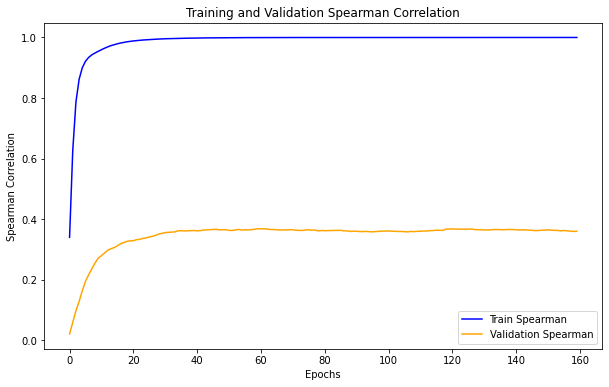

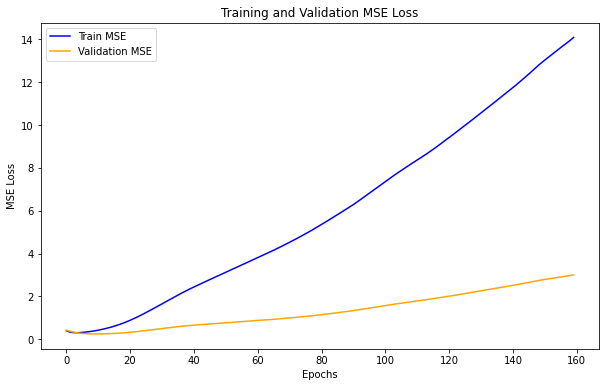

Training complete. Final validation Spearman: 0.3683787124785775


In [3]:
from mlp import MLP, train_margin_ranking
import torch

input_size = X_train_pca.shape[1]
hidden_layers = [64, 32]  # Customize as needed
model = MLP(input_size, hidden_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
margin = 0.5

# Convert DataFrames to numpy arrays
X_train_pca_tensor = torch.tensor(X_train_pca.values, dtype=torch.float32)
y_train_pca_tensor = torch.tensor(y_train_pca.values, dtype=torch.float32)
X_val_pca_tensor = torch.tensor(X_val_pca.values, dtype=torch.float32)
y_val_pca_tensor = torch.tensor(y_val_pca.values, dtype=torch.float32)

train_margin_ranking(model, optimizer,margin, X_train_pca_tensor, y_train_pca_tensor, X_val_pca_tensor , y_val_pca_tensor, epochs=1000)

Epoch [10/1000], Loss: 1.2256, Train Spearman: 0.4085, Val Spearman: 0.2883
Epoch [20/1000], Loss: 0.6689, Train Spearman: 0.4729, Val Spearman: 0.3473
Epoch [30/1000], Loss: 0.4997, Train Spearman: 0.5694, Val Spearman: 0.3924
Epoch [40/1000], Loss: 0.4389, Train Spearman: 0.6250, Val Spearman: 0.4391
Epoch [50/1000], Loss: 0.4051, Train Spearman: 0.6758, Val Spearman: 0.4517
Epoch [60/1000], Loss: 0.3820, Train Spearman: 0.7072, Val Spearman: 0.4609
Epoch [70/1000], Loss: 0.3623, Train Spearman: 0.7383, Val Spearman: 0.4703
Epoch [80/1000], Loss: 0.3452, Train Spearman: 0.7686, Val Spearman: 0.4758
Epoch [90/1000], Loss: 0.3318, Train Spearman: 0.7936, Val Spearman: 0.4778
Epoch [100/1000], Loss: 0.3173, Train Spearman: 0.8176, Val Spearman: 0.4755
Epoch [110/1000], Loss: 0.3054, Train Spearman: 0.8385, Val Spearman: 0.4707
Epoch [120/1000], Loss: 0.2941, Train Spearman: 0.8571, Val Spearman: 0.4601
Epoch [130/1000], Loss: 0.2849, Train Spearman: 0.8752, Val Spearman: 0.4521
Epoch [1

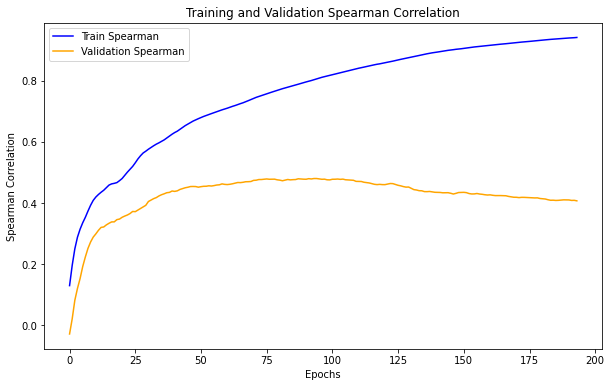

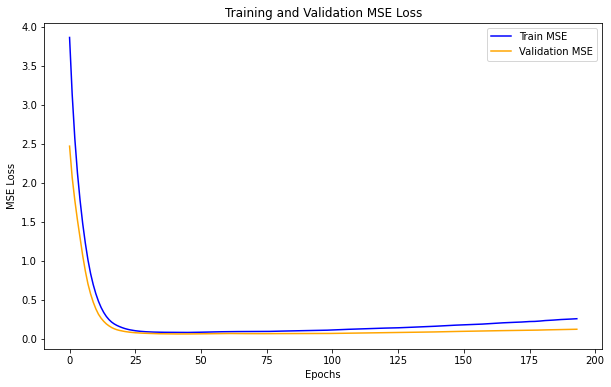

Training complete. Final validation Spearman: 0.4799768546862619


In [5]:
input_size = X_train_ae.shape[1]
hidden_layers = [64, 32]  # Customize as needed
model = MLP(input_size, hidden_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
margin = 0.5

# Convert DataFrames to numpy arrays
X_train_ae_tensor = torch.tensor(X_train_ae.values, dtype=torch.float32)
y_train_ae_tensor = torch.tensor(y_train_ae.values, dtype=torch.float32)
X_val_ae_tensor = torch.tensor(X_val_ae.values, dtype=torch.float32)
y_val_ae_tensor = torch.tensor(y_val_ae.values, dtype=torch.float32)

train_margin_ranking(model, optimizer,margin, X_train_ae_tensor, y_train_ae_tensor, X_val_ae_tensor , y_val_ae_tensor, epochs=1000)

Epoch [10/1000], Loss: 0.2349, Train Spearman: 0.9638, Val Spearman: 0.3931
Epoch [20/1000], Loss: 0.1546, Train Spearman: 0.9937, Val Spearman: 0.3955
Epoch [30/1000], Loss: 0.1208, Train Spearman: 0.9981, Val Spearman: 0.3965
Epoch [40/1000], Loss: 0.1028, Train Spearman: 0.9992, Val Spearman: 0.3884
Epoch [50/1000], Loss: 0.0933, Train Spearman: 0.9995, Val Spearman: 0.3941
Early stopping triggered.


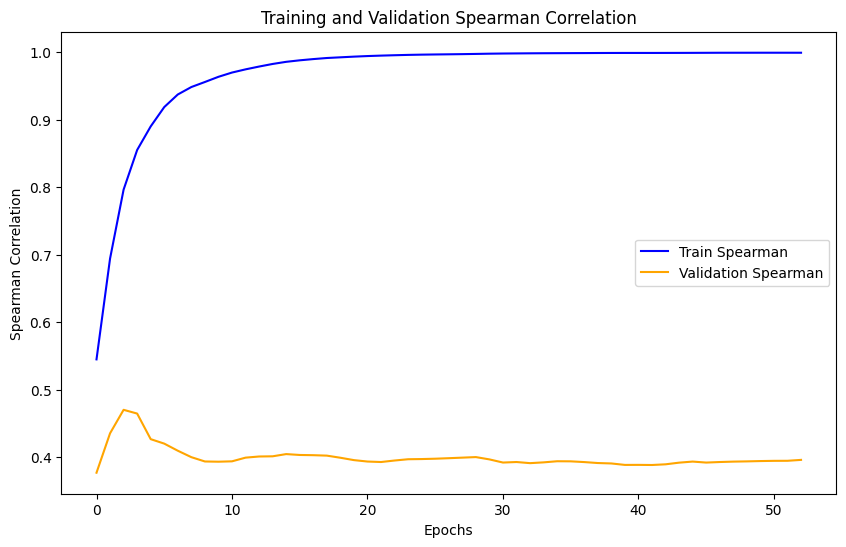

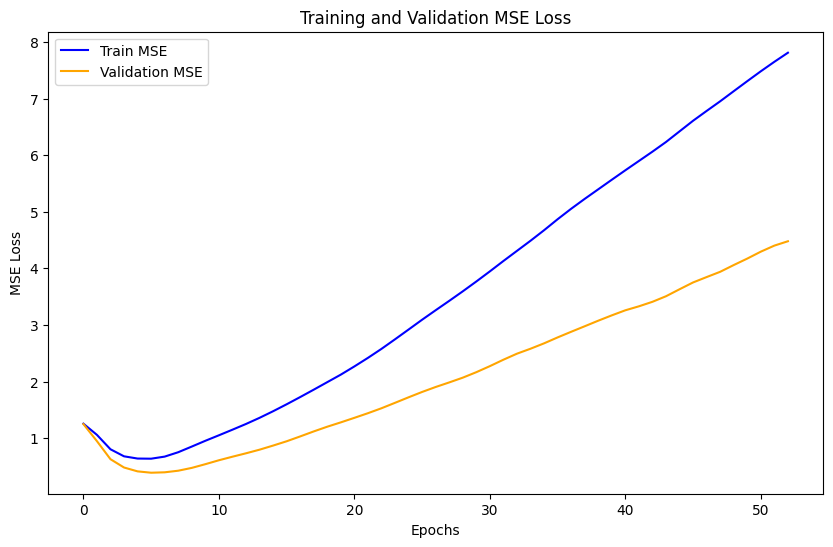

Training complete. Final validation Spearman: 0.4700530292519884
Epoch [10/1000], Loss: 0.5001, Train Spearman: 0.1223, Val Spearman: 0.1750
Epoch [20/1000], Loss: 0.4999, Train Spearman: 0.2057, Val Spearman: 0.2393
Epoch [30/1000], Loss: 0.4999, Train Spearman: 0.2535, Val Spearman: 0.2591
Epoch [40/1000], Loss: 0.5000, Train Spearman: 0.2838, Val Spearman: 0.2827
Epoch [50/1000], Loss: 0.4999, Train Spearman: 0.2946, Val Spearman: 0.2709
Epoch [60/1000], Loss: 0.5000, Train Spearman: 0.3027, Val Spearman: 0.2667
Epoch [70/1000], Loss: 0.4999, Train Spearman: 0.3124, Val Spearman: 0.2633
Epoch [80/1000], Loss: 0.4999, Train Spearman: 0.3127, Val Spearman: 0.2466
Early stopping triggered.


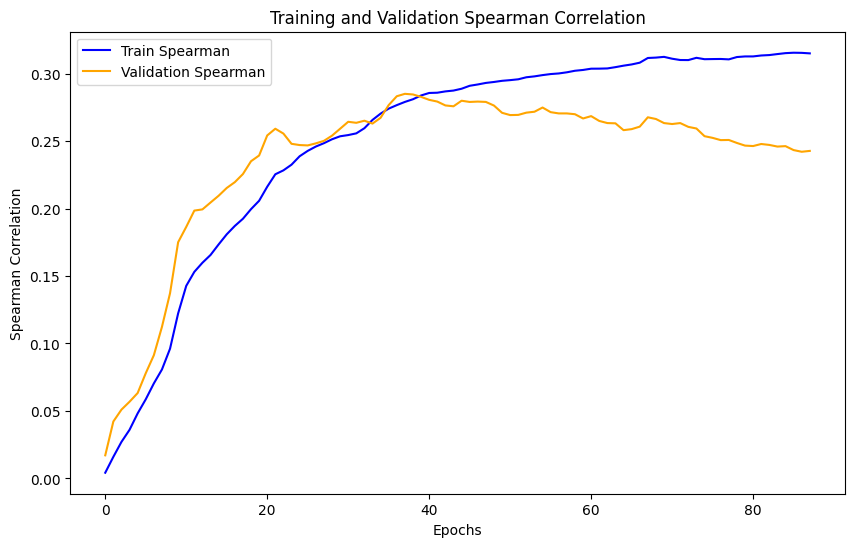

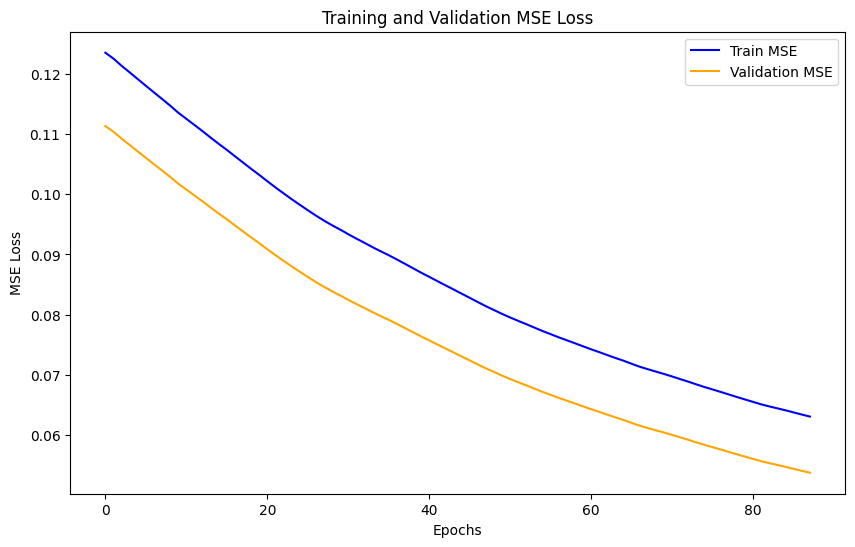

Training complete. Final validation Spearman: 0.2849793986754289
Epoch [10/1000], Loss: 0.3367, Train Spearman: 0.7266, Val Spearman: 0.4234
Epoch [20/1000], Loss: 0.2515, Train Spearman: 0.8811, Val Spearman: 0.4333
Epoch [30/1000], Loss: 0.1926, Train Spearman: 0.9490, Val Spearman: 0.3917
Epoch [40/1000], Loss: 0.1568, Train Spearman: 0.9770, Val Spearman: 0.3664
Epoch [50/1000], Loss: 0.1319, Train Spearman: 0.9903, Val Spearman: 0.3555
Epoch [60/1000], Loss: 0.1159, Train Spearman: 0.9953, Val Spearman: 0.3468
Early stopping triggered.


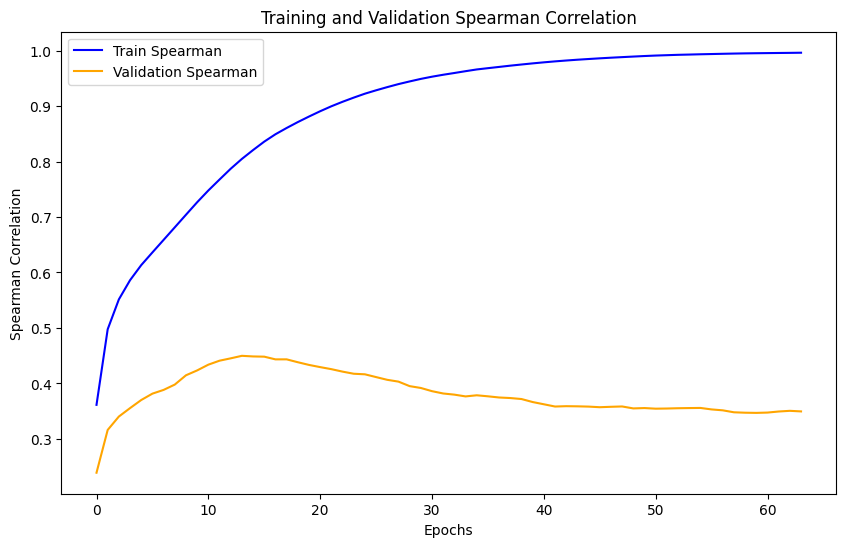

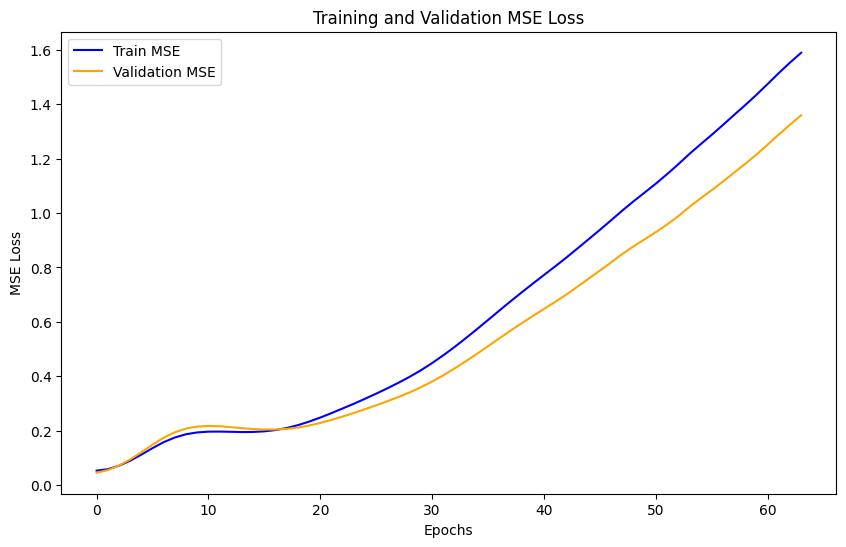

Training complete. Final validation Spearman: 0.4497156264427992


RuntimeError: mat1 and mat2 shapes cannot be multiplied (304x19907 and 735x64)

In [14]:
#try better hyperparameters for MLP on all datasets and store mse and spearman correlation for each dataset in a table

from mlp import MLP, train_margin_ranking
import torch


input_size = X_train.shape[1]
hidden_layers = [64, 32]  # Customize as needed
model = MLP(input_size, hidden_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
margin = 0.5

# Convert DataFrames to numpy arrays
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

train_margin_ranking(model, optimizer,margin, X_train_tensor, y_train_tensor, X_val_tensor , y_val_tensor, epochs=1000)

input_size = X_train_vae.shape[1]
hidden_layers = [64, 32]  # Customize as needed
model = MLP(input_size, hidden_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
margin = 0.5

# Convert DataFrames to numpy arrays
X_train_vae_tensor = torch.tensor(X_train_vae.values, dtype=torch.float32)
y_train_vae_tensor = torch.tensor(y_train_vae.values, dtype=torch.float32)
X_val_vae_tensor = torch.tensor(X_val_vae.values, dtype=torch.float32)
y_val_vae_tensor = torch.tensor(y_val_vae.values, dtype=torch.float32)

train_margin_ranking(model, optimizer,margin, X_train_vae_tensor, y_train_vae_tensor, X_val_vae_tensor , y_val_vae_tensor, epochs=1000)

input_size = X_train_cgc.shape[1]
hidden_layers = [64, 32]  # Customize as needed
model = MLP(input_size, hidden_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
margin = 0.5

# Convert DataFrames to numpy arrays
X_train_cgc_tensor = torch.tensor(X_train_cgc.values, dtype=torch.float32)
y_train_cgc_tensor = torch.tensor(y_train_cgc.values, dtype=torch.float32)
X_val_cgc_tensor = torch.tensor(X_val_cgc.values, dtype=torch.float32)
y_val_cgc_tensor = torch.tensor(y_val_cgc.values, dtype=torch.float32)

train_margin_ranking(model, optimizer,margin, X_train_cgc_tensor, y_train_cgc_tensor, X_val_cgc_tensor , y_val_cgc_tensor, epochs=1000)

#input_size = X_train_vae2.shape[1]
#hidden_layers = [64, 32]  # Customize as needed
#model = MLP(input_size, hidden_layers)
#optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
#margin = 0.5

# Convert DataFrames to numpy arrays
#X_train_vae2_tensor = torch.tensor(X_train_vae2.values, dtype=torch.float32)
#y_train_vae2_tensor = torch.tensor(y_train_vae2.values, dtype=torch.float32)
#X_val_vae2_tensor = torch.tensor(X_val_vae2.values, dtype=torch.float32)
#y_val_vae2_tensor = torch.tensor(y_val_vae2.values, dtype=torch.float32)

#train_margin_ranking(model, optimizer,margin, X_train_vae2_tensor, y_train_vae2_tensor, X_val_vae2_tensor , y_val_vae2_tensor, epochs=1000)

# Compute predictions on test set

# Convert DataFrames to numpy arrays

X_test_tensor = torch.tensor(test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(targets.values, dtype=torch.float32)

X_test_ae_tensor = torch.tensor(ae_test.values, dtype=torch.float32)
y_test_ae_tensor = torch.tensor(targets.values, dtype=torch.float32)

X_test_vae_tensor = torch.tensor(vae_test.values, dtype=torch.float32)
y_test_vae_tensor = torch.tensor(targets.values, dtype=torch.float32)

X_test_pca_tensor = torch.tensor(pca_test.values, dtype=torch.float32)
y_test_pca_tensor = torch.tensor(targets.values, dtype=torch.float32)

X_test_cgc_tensor = torch.tensor(cgc_test.values, dtype=torch.float32)
y_test_cgc_tensor = torch.tensor(targets.values, dtype=torch.float32)

#X_test_vae2_tensor = torch.tensor(vae2_test.values, dtype=torch.float32)
#y_test_vae2_tensor = torch.tensor(targets.values, dtype=torch.float32)

# Compute predictions
y_pred = model(X_test_tensor).detach().numpy()
y_pred_ae = model(X_test_ae_tensor).detach().numpy()

y_pred_vae = model(X_test_vae_tensor).detach().numpy()
y_pred_pca = model(X_test_pca_tensor).detach().numpy()
y_pred_cgc = model(X_test_cgc_tensor).detach().numpy()
#y_pred_vae2 = model(X_test_vae2_tensor).detach().numpy()

# Compute metrics
mse = mean_squared_error(targets, y_pred)
r2 = r2_score(targets, y_pred)
spearman = spearmanr(targets, y_pred)[0]
print(f"MLP on non-encoded data: MSE={mse}, R2={r2}, Spearman={spearman}")

mse_ae = mean_squared_error(targets, y_pred_ae)
r2_ae = r2_score(targets, y_pred_ae)

spearman_ae = spearmanr(targets, y_pred_ae)[0]
print(f"MLP on AE-encoded data: MSE={mse_ae}, R2={r2_ae}, Spearman={spearman_ae}")

mse_vae = mean_squared_error(targets, y_pred_vae)
r2_vae = r2_score(targets, y_pred_vae)
spearman_vae = spearmanr(targets, y_pred_vae)[0]

print(f"MLP on VAE-encoded data: MSE={mse_vae}, R2={r2_vae}, Spearman={spearman_vae}")

mse_pca = mean_squared_error(targets, y_pred_pca)
r2_pca = r2_score(targets, y_pred_pca)
spearman_pca = spearmanr(targets, y_pred_pca)[0]

print(f"MLP on PCA-encoded data: MSE={mse_pca}, R2={r2_pca}, Spearman={spearman_pca}")

mse_cgc = mean_squared_error(targets, y_pred_cgc)
r2_cgc = r2_score(targets, y_pred_cgc)
spearman_cgc = spearmanr(targets, y_pred_cgc)[0]

print(f"MLP on CGC-encoded data: MSE={mse_cgc}, R2={r2_cgc}, Spearman={spearman_cgc}")

#mse_vae2 = mean_squared_error(targets, y_pred_vae2)
#r2_vae2 = r2_score(targets, y_pred_vae2)
#spearman_vae2 = spearmanr(targets, y_pred_vae2)[0]

#print(f"MLP on VAE2-encoded data: MSE={mse_vae2}, R2={r2_vae2}, Spearman={spearman_vae2}")

# Store results in a table

results = pd.DataFrame({
    "Dataset": ["Non-encoded", "AE-encoded", "VAE-encoded", "PCA-encoded", "CGC-encoded"],
    "MSE": [mse, mse_ae, mse_vae, mse_pca, mse_cgc],
    "R2": [r2, r2_ae, r2_vae, r2_pca, r2_cgc],
    "Spearman": [spearman
                    ,spearman_ae, spearman_vae, spearman_pca, spearman_cgc]
})

print(results)



In [6]:
# Linear regression (with kFold) compare the spearman and mse for each dataset in a table


#custom scorer for spearman correlation

from sklearn.metrics import make_scorer
from scipy.stats import spearmanr

def spearmanr_score(y_true, y_pred):
    return spearmanr(y_true, y_pred)[0]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def get_scores(X, y, model):
    
    mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    spearman = cross_val_score(model, X, y, cv=5, scoring=make_scorer(spearmanr_score)).mean()
    return mse, spearman

model = LinearRegression()
scores = pd.DataFrame(columns=['MSE', 'Spearman'])

scores.loc['Non encoded'] = get_scores(X_train, y_train, model)
scores.loc['AE'] = get_scores(X_train_ae, y_train_ae, model)
scores.loc['VAE'] = get_scores(X_train_vae, y_train_vae, model)
scores.loc['PCA'] = get_scores(X_train_pca, y_train_pca, model)
scores.loc['CGC'] = get_scores(X_train_cgc, y_train_cgc, model)

print(scores)



                  MSE  Spearman
Non encoded  0.008703  0.473583
AE           0.009195  0.414825
VAE          0.010876  0.274114
PCA          0.008713  0.472861
CGC          0.039193  0.164998


In [7]:
# Random Forest (with kFold) compare the spearman and mse for each dataset in a table

def get_scores(X_train, y_train, model,kfold):
    mse = -cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error').mean()
    spearman = cross_val_score(model, X_train, y_train, cv=kfold, scoring=make_scorer(spearmanr_score)).mean()
    return mse, spearman

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=42)
scores = pd.DataFrame(columns=['MSE', 'Spearman'])

scores.loc['Non encoded'] = get_scores(X_train, y_train, model,2)
print("Non encoded done")
scores.loc['AE'] = get_scores(X_train_ae, y_train_ae, model,3)
scores.loc['VAE'] = get_scores(X_train_vae, y_train_vae, model,3)
scores.loc['PCA'] = get_scores(X_train_pca, y_train_pca, model,3)
scores.loc['CGC'] = get_scores(X_train_cgc, y_train_cgc, model,3)

print(scores)

c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rache\AppData\Local\Programs\Py

Non encoded done


c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\rache\AppData\Local\Programs\Py

                  MSE  Spearman
Non encoded  0.008879  0.402430
AE           0.009283  0.421000
VAE          0.011024  0.174613
PCA          0.009760  0.361167
CGC          0.009034  0.400609


In [4]:
# Gradient Boosting (with kFold) compare the spearman and mse for each dataset in a table

from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import make_scorer
from scipy.stats import spearmanr

def spearmanr_score(y_true, y_pred):
    return spearmanr(y_true, y_pred)[0]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def get_scores(X_train, y_train, model):
    mse = -cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
    spearman = cross_val_score(model, X_train, y_train, cv=3, scoring=make_scorer(spearmanr_score)).mean()
    return mse, spearman

model = GradientBoostingRegressor(n_estimators=50, random_state=42)

scores = pd.DataFrame(columns=['MSE', 'Spearman'])

scores.loc['Non encoded'] = get_scores(X_train, y_train, model)
scores.loc['AE'] = get_scores(X_train_ae, y_train_ae, model)
scores.loc['VAE'] = get_scores(X_train_vae, y_train_vae, model)
scores.loc['PCA'] = get_scores(X_train_pca, y_train_pca, model)
scores.loc['CGC'] = get_scores(X_train_cgc, y_train_cgc, model)


print(scores)

c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

                  MSE  Spearman
Non encoded  0.009051  0.436817
AE           0.009276  0.432588
VAE          0.011300  0.216838
PCA          0.010145  0.336441
CGC          0.009546  0.407281


In [5]:
# Neural Network (with kFold) compare the spearman and mse for each dataset in a table

from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
scores = pd.DataFrame(columns=['MSE', 'Spearman'])

scores.loc['Non encoded'] = get_scores(X_train, y_train, model)
scores.loc['AE'] = get_scores(X_train_ae, y_train_ae, model)
scores.loc['VAE'] = get_scores(X_train_vae, y_train_vae, model)
scores.loc['PCA'] = get_scores(X_train_pca, y_train_pca, model)
scores.loc['CGC'] = get_scores(X_train_cgc, y_train_cgc, model)

print(scores)

c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Pyth

                   MSE  Spearman
Non encoded   0.954367  0.066243
AE           19.817146 -0.027985
VAE           0.010722  0.138330
PCA           9.017656 -0.044257
CGC           0.146426  0.079644


c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


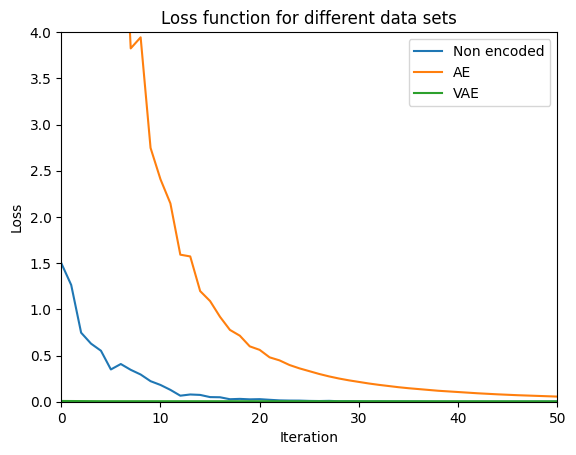

In [ ]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                        solver='adam', verbose=0,  random_state=21,tol=0.000000001)

mlp.fit(X_train, y_train)

plt.plot(mlp.loss_curve_, label="Non encoded")

mlp.fit(X_train_ae, y_train_ae)

plt.plot(mlp.loss_curve_, label="AE")

mlp.fit(X_train_vae, y_train_vae)

plt.plot(mlp.loss_curve_, label="VAE")

plt.xlim(0,50)

plt.ylim(0,4)

plt.legend()

plt.xlabel("Iteration")

plt.ylabel("Loss")

plt.title("Loss function for different data sets")

plt.show()

In [ ]:
#SVM

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

svr.fit(X_train, y_train)
y_pred = svr.predict(X_val)
print("Non-encoded data")
print("MSE: ", mean_squared_error(y_val, y_pred))
print("R2: ", r2_score(y_val, y_pred))
print("Spearman: ", spearmanr(y_val, y_pred).correlation)

svr.fit(X_train_ae, y_train_ae)
y_pred = svr.predict(X_val_ae)
print("Autoencoder data")
print("MSE: ", mean_squared_error(y_val_ae, y_pred))
print("R2: ", r2_score(y_val_ae, y_pred))
print("Spearman: ", spearmanr(y_val_ae, y_pred).correlation)

svr.fit(X_train_vae, y_train_vae)
y_pred = svr.predict(X_val_vae)
print("VAE data")
print("MSE: ", mean_squared_error(y_val_vae, y_pred))
print("R2: ", r2_score(y_val_vae, y_pred))
print("Spearman: ", spearmanr(y_val_vae, y_pred).correlation)

#svr.fit(X_train_vae2, y_train_vae2)
#y_pred = svr.predict(X_val_vae2)
#print("VAE2 data")
#print("MSE: ", mean_squared_error(y_val_vae2, y_pred))
#print("R2: ", r2_score(y_val_vae2, y_pred))
#print("Spearman: ", spearmanr(y_val_vae2, y_pred))

c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Non-encoded data
MSE:  0.018317306698713474
R2:  -1.4468489907891149
Spearman:  0.32743907803303696
Autoencoder data
MSE:  0.014511898094261141
R2:  -0.9385176975210718
Spearman:  0.29091265274150613
VAE data
MSE:  0.018216092090355938
R2:  -1.4333286154202756
Spearman:  0.15622542737665357


c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#xgboost

print("XGBoost")

from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    objective='rank:pairwise',  
    learning_rate=0.1,
    n_estimators=500,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
    verbose=1
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)
print("Non-encoded data")
print("MSE: ", mean_squared_error(y_val, y_pred))
print("R2: ", r2_score(y_val, y_pred))
print("Spearman: ", spearmanr(y_val, y_pred).correlation)

xgb_model.fit(X_train_ae, y_train_ae)
y_pred = xgb_model.predict(X_val_ae)
print("Autoencoder data")
print("MSE: ", mean_squared_error(y_val_ae, y_pred))
print("R2: ", r2_score(y_val_ae, y_pred))
print("Spearman: ", spearmanr(y_val_ae, y_pred).correlation)

xgb_model.fit(X_train_vae, y_train_vae)
y_pred = xgb_model.predict(X_val_vae)
print("VAE data")
print("MSE: ", mean_squared_error(y_val_vae, y_pred))
print("R2: ", r2_score(y_val_vae, y_pred))
print("Spearman: ", spearmanr(y_val_vae, y_pred).correlation)


#LightGBM

print("LightGBM")
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_val)
print("Non-encoded data")
print("MSE: ", mean_squared_error(y_val, y_pred))
print("R2: ", r2_score(y_val, y_pred))
print("Spearman: ", spearmanr(y_val, y_pred).correlation)

lgb_model.fit(X_train_ae, y_train_ae)
y_pred = lgb_model.predict(X_val_ae)
print("Autoencoder data")
print("MSE: ", mean_squared_error(y_val_ae, y_pred))
print("R2: ", r2_score(y_val_ae, y_pred))
print("Spearman: ", spearmanr(y_val_ae, y_pred).correlation)

lgb_model.fit(X_train_vae, y_train_vae)
y_pred = lgb_model.predict(X_val_vae)
print("VAE data")
print("MSE: ", mean_squared_error(y_val_vae, y_pred))
print("R2: ", r2_score(y_val_vae, y_pred))
print("Spearman: ", spearmanr(y_val_vae, y_pred).correlation)

#CatBoost

print("CatBoost")
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_val)
print("Non-encoded data")
print("MSE: ", mean_squared_error(y_val, y_pred))
print("R2: ", r2_score(y_val, y_pred))
print("Spearman: ", spearmanr(y_val, y_pred).correlation)

cat_model.fit(X_train_ae, y_train_ae)
y_pred = cat_model.predict(X_val_ae)
print("Autoencoder data")
print("MSE: ", mean_squared_error(y_val_ae, y_pred))
print("R2: ", r2_score(y_val_ae, y_pred))
print("Spearman: ", spearmanr(y_val_ae, y_pred).correlation)

cat_model.fit(X_train_vae, y_train_vae)
y_pred = cat_model.predict(X_val_vae)
print("VAE data")
print("MSE: ", mean_squared_error(y_val_vae, y_pred))
print("R2: ", r2_score(y_val_vae, y_pred))
print("Spearman: ", spearmanr(y_val_vae, y_pred).correlation)


XGBoost
Non-encoded data
MSE:  40.23302985454209
R2:  -5373.37900206633
Spearman:  0.29313104764300796
Autoencoder data
MSE:  28.688239542668974
R2:  -3831.211313982431
Spearman:  0.2778562287831986
VAE data
MSE:  20.430448965885745
R2:  -2728.1252068764634
Spearman:  0.1054671734692738
LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.505266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3665431
[LightGBM] [Info] Number of data points in the train set: 593, number of used features: 19746
[LightGBM] [Info] Start training from score 0.129591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

KeyboardInterrupt: 

C:\Users\rache\AppData\Local\Temp\ipykernel_91052\3717098156.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


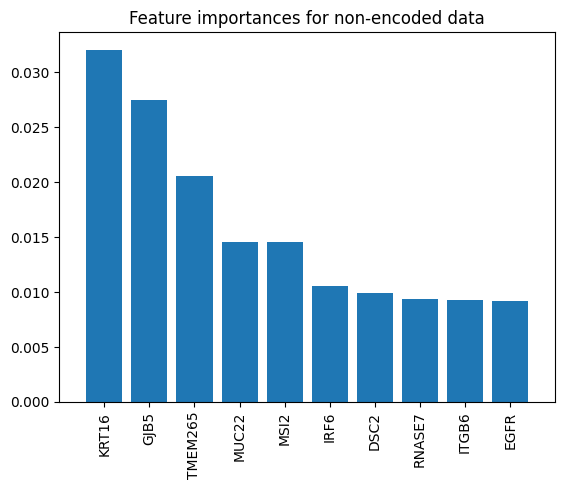

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=21)

# Fit random forest on non-encoded data
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure()
plt.title("Feature importances for non-encoded data")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.show()


C:\Users\rache\AppData\Local\Temp\ipykernel_34780\2537741643.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


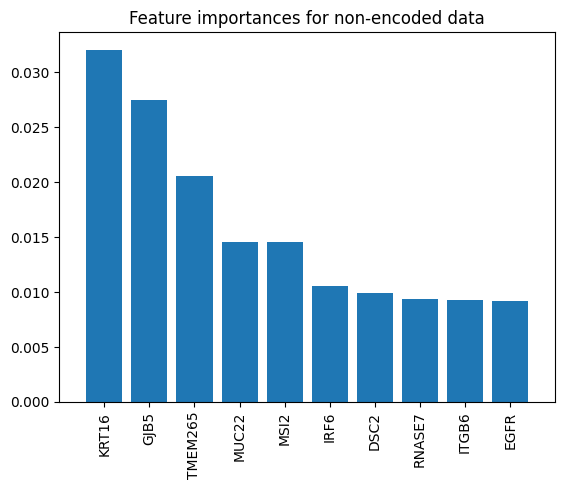

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=21)

# Fit random forest on non-encoded data
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure()
plt.title("Feature importances for non-encoded data")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.show()


C:\Users\rache\AppData\Local\Temp\ipykernel_91052\762187660.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_ae, y_train_ae)


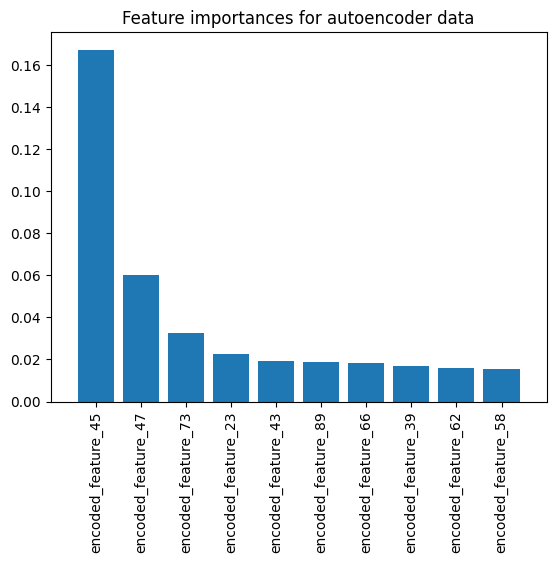

C:\Users\rache\AppData\Local\Temp\ipykernel_91052\762187660.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_vae, y_train_vae)


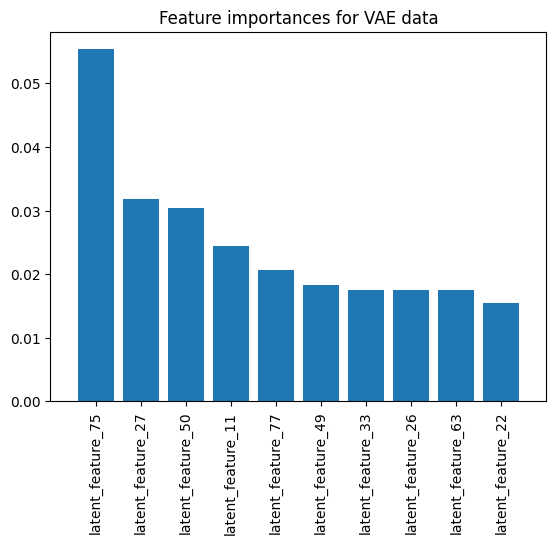

In [ ]:

# Fit random forest on autoencoder data
rf.fit(X_train_ae, y_train_ae)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train_ae.columns
plt.figure()
plt.title("Feature importances for autoencoder data")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.show()

# Fit random forest on VAE data
rf.fit(X_train_vae, y_train_vae)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train_vae.columns
plt.figure()
plt.title("Feature importances for VAE data")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.show()

In [ ]:
def run_random_forest(X_train, X_val, y_train, y_val):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.values.ravel())
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    spearman = spearmanr(y_val, y_pred)
    print(f'Best Params: {grid_search.best_params_}')
    print(f'MSE: {mse}')
    print(f'R2: {r2}')
    print(f'Spearman: {spearman.correlation}')

def run_mlp(X_train, X_val, y_train, y_val):
    param_grid = {
        'hidden_layer_sizes': [(50, 50), (100, 100), (100, 100, 100)],
        'max_iter': [500, 1000],
        'alpha': [0.0001, 0.001, 0.01]
    }
    mlp = MLPRegressor(random_state=42)
    grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.values.ravel())
    best_mlp = grid_search.best_estimator_
    y_pred = best_mlp.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    spearman = spearmanr(y_val, y_pred)
    print(f'Best Params: {grid_search.best_params_}')
    print(f'MSE: {mse}')
    print(f'R2: {r2}')
    print(f'Spearman: {spearman.correlation}')

def run_linear_regression(X_train, X_val, y_train, y_val):
    param_grid = {
        'fit_intercept': [True, False]
    }
    lr = LinearRegression()
    grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.values.ravel())
    best_lr = grid_search.best_estimator_
    y_pred = best_lr.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    spearman = spearmanr(y_val, y_pred)
    print(f'Best Params: {grid_search.best_params_}')
    print(f'MSE: {mse}')
    print(f'R2: {r2}')
    print(f'Spearman: {spearman.correlation}')
    plt.plot(lr.loss_curve_)


print("Linear Regression")

print("Non encoded data")
run_linear_regression(X_train, X_val, y_train, y_val)
print("Autoencoder data")
run_linear_regression(X_train_ae, X_val_ae, y_train_ae, y_val_ae)
print("VAE data")
run_linear_regression(X_train_vae, X_val_vae, y_train_vae, y_val_vae)
print("VAE2 data")
run_linear_regression(X_train_vae2, X_val_vae2, y_train_vae2, y_val_vae2)

print("MLP")

print("Non encoded data")
run_mlp(X_train, X_val, y_train, y_val)
print("Autoencoder data")
run_mlp(X_train_ae, X_val_ae, y_train_ae, y_val_ae)
print("VAE data")
run_mlp(X_train_vae, X_val_vae, y_train_vae, y_val_vae)
print("VAE2 data")
run_mlp(X_train_vae2, X_val_vae2, y_train_vae2, y_val_vae2)

print("Random Forest")

print("Non encoded data")
run_random_forest(X_train, X_val, y_train, y_val)
print("Autoencoder data")
run_random_forest(X_train_ae, X_val_ae, y_train_ae, y_val_ae)
print("VAE data")
run_random_forest(X_train_vae, X_val_vae, y_train_vae, y_val_vae)
print("VAE2 data")
run_random_forest(X_train_vae2, X_val_vae2, y_train_vae2, y_val_vae2)